##**Task 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##**Dataset :

https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing



In [1]:
# importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Datasets
data = pd.read_csv('D:/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    k_means = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
print(wcss)

[281831.54466666665, 70581.3808, 31320.711199999998, 17758.79250355619, 11468.96874702381, 7921.863473076923, 5911.632365518539, 4541.979023391813, 3571.9110955882356, 2943.933100840336]


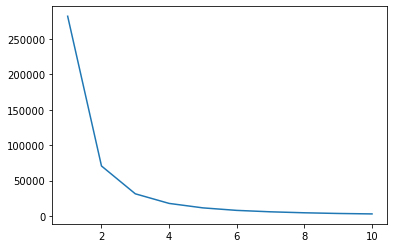

In [5]:
#Elbow Method
x_range = range(1,11)
plt.plot(x_range,wcss)

choose the number of clusters as 3

In [6]:
##k-means++ Initialization
k_means = KMeans(n_clusters = 3,init = 'k-means++',random_state = 0)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [7]:
y_kmeans=k_means.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

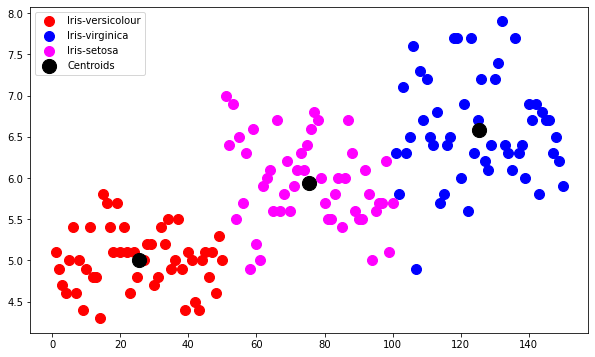

In [8]:
#Visualizing the clusters
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-versicolour')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-virginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='magenta',label='Iris-setosa')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.legend()
plt.show()